<a href="https://colab.research.google.com/github/arthireddy14/Machine_Learning/blob/main/heart_svm_linear_poly_rbf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# handle missing values
df.dropna(inplace=True)
# encode categorical columns
label_encoders={}
for col in df.select_dtypes(include=['object']).columns:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
  label_encoders[col]=le

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=df.drop(columns='target')
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
# Train SVM with Linear Kernel
svm_linear=SVC(kernel='linear',C=1)
svm_linear.fit(x_train,y_train)
y_pred_linear=svm_linear.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy is ",accuracy_score(y_test,y_pred_linear))
print("Confusion matrix[TN FP][FN TP] ",confusion_matrix(y_test,y_pred_linear))

Accuracy is  0.8146341463414634
Confusion matrix[TN FP][FN TP]  [[72 30]
 [ 8 95]]


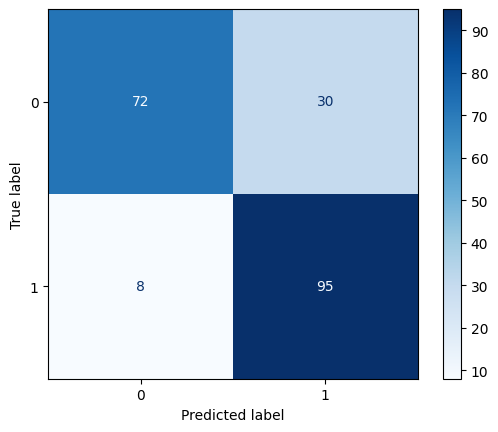

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_linear)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


In [ ]:
# plt.scatter(x,y,color='blue')
# plt.plot(x_test,svm_linear.predict(x_test),color='green')
# plt.show()

In [ ]:
# Train SVM with Polynomial Kernel
svm_poly=SVC(kernel='poly',degree=3,C=1)
svm_poly.fit(x_train,y_train)
y_pred_poly=svm_poly.predict(x_test)

In [ ]:
print("Accuracy is ",accuracy_score(y_test,y_pred_poly))
print("Confusion matrix[TN FP][FN TP] ",confusion_matrix(y_test,y_pred_poly))

Accuracy is  0.9073170731707317
Confusion matrix[TN FP][FN TP]  [[ 85  17]
 [  2 101]]


In [ ]:
# Train SVM with RBF Kernel
svm_rbf=SVC(kernel='rbf',C=1)
svm_rbf.fit(x_train,y_train)
y_pred_rbf=svm_rbf.predict(x_test)

In [ ]:
print("Accuracy is ",accuracy_score(y_test,y_pred_rbf))
print("Confusion matrix[TN FP][FN TP] ",confusion_matrix(y_test,y_pred_rbf))

Accuracy is  0.8878048780487805
Confusion matrix[TN FP][FN TP]  [[85 17]
 [ 6 97]]
